# Proyek Analisis Data: Air Quality
- **Nama:** Rizfi Ferdiansyah
- **Email:** rizfiferdian@gmail.com
- **ID Dicoding:** rrtxtxt

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara curah hujan (RAIN) dengan tingkat polusi PM10, NO2 dan SO2 di berbagai kota?
- Bagaimana tren peningkatan rata-rata curah hujan pada tiap kota untuk tiap tahunnya?
- Bagaimana persebaran polusi NO2 di tiap kota pada tahun 2017? 

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [3]:
dataset_path = './dataset'

# Get all dataset file
csv_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]

dataframes = []

# Loop to load all dataset
for csv_file in csv_files:
    file_path = os.path.join(dataset_path, csv_file)
    df = pd.read_csv(file_path, index_col=[0])
    dataframes.append(df)
    print(f"Data from file {csv_file}")

# merge all dataframes into single Dataframe
df = pd.concat(dataframes, ignore_index=True)
# df.drop("Unnamed:0",axis=1, inplace=True)
df

Data from file all_PRSA_Data.csv
Data from file cleaned_PRSA_Data.csv
Data from file PRSA_Data_Aotizhongxin_20130301-20170228.csv
Data from file PRSA_Data_Changping_20130301-20170228.csv
Data from file PRSA_Data_Dingling_20130301-20170228.csv
Data from file PRSA_Data_Dongsi_20130301-20170228.csv
Data from file PRSA_Data_Guanyuan_20130301-20170228.csv
Data from file PRSA_Data_Gucheng_20130301-20170228.csv
Data from file PRSA_Data_Huairou_20130301-20170228.csv
Data from file PRSA_Data_Nongzhanguan_20130301-20170228.csv
Data from file PRSA_Data_Shunyi_20130301-20170228.csv
Data from file PRSA_Data_Tiantan_20130301-20170228.csv
Data from file PRSA_Data_Wanliu_20130301-20170228.csv
Data from file PRSA_Data_Wanshouxigong_20130301-20170228.csv


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,rain_cat
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,NaN,NaN
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,NaN,NaN
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,NaN,NaN
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,NaN,NaN
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683067,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,NaN,NaN
1683068,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,NaN,NaN
1683069,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,NaN,NaN
1683070,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,NaN,NaN


Code di atas dilakukan untuk menyatukan file-file dataset Air Quality yang awalnya terdiri dari banyak file.

**Insight:**
- Folder dataset awalnya terdiri dari 12 file csv. Setelah penggabungan, didapat dataset dengan total kolom sebanyak 17 dengan total row sebanyak 420768.
- Dataset ini memiliki kolom-kolom yang menunjukkan waktu seperti Month, Day, dan Hour. Atribut ini bisa digunakan untuk tren musiman dan perubahan kualitas udara sepanjang waktu.
- Terdapat kolom "station" yang memberikan informasi mengenai bagaimana kualitas udara berbeda di berbagai lokasi, yang dapat digunakan untuk analisis perbandingan antara stasiun yang berbeda.
- Kolom RAIN menunjukkan data tentang curah hujan yang tercatat. Kolom ini bisa menunjukkan gambaran seberapa sering hujan tercatat, dan apakah curah hujan berhubungan dengan perubahan dalam kualitas udara. 
- Kolom seperti PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM memberikan gambaran tentang kualitas udara dan kondisi cuaca.

### Assessing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683072 entries, 0 to 1683071
Data columns (total 19 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   year      1683072 non-null  int64  
 1   month     1683072 non-null  int64  
 2   day       1683072 non-null  int64  
 3   hour      1683072 non-null  int64  
 4   PM2.5     1665594 non-null  float64
 5   PM10      1670174 non-null  float64
 6   SO2       1665030 non-null  float64
 7   NO2       1658840 non-null  float64
 8   CO        1641670 non-null  float64
 9   O3        1656518 non-null  float64
 10  TEMP      1682276 non-null  float64
 11  PRES      1682286 non-null  float64
 12  DEWP      1682266 non-null  float64
 13  RAIN      1682292 non-null  float64
 14  wd        1679428 non-null  object 
 15  WSPM      1682436 non-null  float64
 16  station   1683072 non-null  object 
 17  date      841536 non-null   object 
 18  rain_cat  33054 non-null    object 
dtypes: float64(11), int64

Code di atas memberikan informasi terkait tipe data dari tiap kolom dan total data yang non-null. Kolom wd dan station memiliki tipe data sebagai object, dimana seharusnya kolom ini memiliki tipe data string.

In [5]:
df.isna().sum()

year              0
month             0
day               0
hour              0
PM2.5         17478
PM10          12898
SO2           18042
NO2           24232
CO            41402
O3            26554
TEMP            796
PRES            786
DEWP            806
RAIN            780
wd             3644
WSPM            636
station           0
date         841536
rain_cat    1650018
dtype: int64

Code di atas digunakan untuk mengetahui jumlah nilai null dari tiap kolom. Terdapat beberapa kolom yang memiliki nilai nullm dengan kolom CO memiliki jumlah data nuil paling banyak.

In [6]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  841514


Code ini untuk menemukan nilai-nilai yang terduplikasi, dimana hasilnya adalah 0.

In [7]:
df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,1.683072e+06,1.683072e+06,1.683072e+06,1.683072e+06,1.665594e+06,1.670174e+06,1.665030e+06,1.658840e+06,1.641670e+06,1.656518e+06,1.682276e+06,1.682286e+06,1.682266e+06,1.682292e+06,1.682436e+06
mean,2.014663e+03,6.522930e+00,1.572964e+01,1.150000e+01,7.981682e+01,1.047576e+02,1.587241e+01,5.061878e+01,1.233287e+03,5.730399e+01,1.353533e+01,1.010750e+03,2.486620e+00,6.445213e-02,1.729872e+00
std,1.177197e+00,3.448704e+00,8.800095e+00,6.922189e+00,8.088693e+01,9.210510e+01,2.177531e+01,3.514998e+01,1.161009e+03,5.690268e+01,1.143699e+01,1.047417e+01,1.379575e+01,8.208204e-01,1.246529e+00
min,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.856000e-01,1.026500e+00,1.000000e+02,2.142000e-01,-1.990000e+01,9.824000e+02,-4.340000e+01,0.000000e+00,0.000000e+00
25%,2.014000e+03,4.000000e+00,8.000000e+00,5.750000e+00,2.000000e+01,3.600000e+01,3.000000e+00,2.300000e+01,5.000000e+02,1.093043e+01,3.100000e+00,1.002300e+03,-8.900000e+00,0.000000e+00,9.000000e-01
50%,2.015000e+03,7.000000e+00,1.600000e+01,1.150000e+01,5.500000e+01,8.200000e+01,7.000000e+00,4.300000e+01,9.000000e+02,4.500000e+01,1.450000e+01,1.010400e+03,3.000000e+00,0.000000e+00,1.400000e+00
75%,2.016000e+03,1.000000e+01,2.300000e+01,1.725000e+01,1.110000e+02,1.450000e+02,2.000000e+01,7.100000e+01,1.500000e+03,8.200000e+01,2.330000e+01,1.019000e+03,1.510000e+01,0.000000e+00,2.200000e+00
max,2.017000e+03,1.200000e+01,3.100000e+01,2.300000e+01,9.990000e+02,9.990000e+02,5.000000e+02,2.900000e+02,1.000000e+04,1.071000e+03,4.160000e+01,1.042800e+03,2.910000e+01,7.250000e+01,1.320000e+01


Code di atas digunakan untuk mendapatkan statistikla deskriptif pada dataset.

**Insight:**
- Dataset ini memiliki kolom-kolom yang memberikan petunjuk waktu seperti Year, Month, Day, dan Hour. Bisa dijadikan jadi satu kolom untuk mempermudah proses analisis tren.
- Rata-rata tahun menunjukkan bahwa sebagian besar data berasal dari tahun 2014 (rata-rata 2014.66), dan rentang tahun data berada antara 2013 dan 2017.
- Rata-rata bulan menunjukkan bahwa sebagian besar data terkumpul pada bulan sekitar Juni (bulan ke-6), dengan sedikit variasi antar bulan (rata-rata bulan = 6.5).
- Variasi day menunjukkan bahwa data tidak terfokus hanya pada beberapa hari tertentu, tetapi mencakup sebagian besar hari dalam bulan, memberikan representasi yang lebih lengkap tentang kondisi kualitas udara.
- Jam yang tercatat bervariasi antara 0 hingga 23, yang mencerminkan bahwa kualitas udara diukur setiap jam, memungkinkan analisis kualitas udara sepanjang hari.
- Nilai rata-rata PM2.5 adalah 79.79 dengan standar deviasi yang tinggi (80.82), yang menunjukkan variabilitas yang sangat besar. Nilai maksimum tercatat 999, yang sangat tinggi dan menunjukkan kejadian polusi yang sangat parah di beberapa waktu tertentu. Hal ini menunjukkan bahwa kualitas udara bisa sangat buruk di beberapa periode.
- Rata-rata PM10 adalah 104.60, juga menunjukkan variasi yang besar (standar deviasi 91.77), dengan nilai maksimum tercatat 999, yang mengindikasikan adanya kejadian polusi parah.
- Rata-rata SO2 adalah 15.83, dengan nilai maksimum 500. Ini menunjukkan adanya polusi yang signifikan oleh sulfur dioksida, yang berhubungan dengan aktivitas industri, kendaraan bermotor, atau kegiatan yang mencemari udara.
- Rata-rata NO2 adalah 50.64, dengan variasi yang cukup besar. Nilai maksimum 290 menunjukkan potensi dampak polusi yang serius.
- Rata-rata CO (karbon monoksida) adalah 1230.77, dengan standar deviasi yang sangat besar (1160.18). Karbon monoksida adalah polutan yang berhubungan dengan pembakaran bahan bakar kendaraan dan peralatan industri, dan variabilitas yang sangat besar menunjukkan dampak yang bisa sangat buruk di beberapa lokasi dan waktu.
- Ozon memiliki rata-rata adalah 57.37, dengan maksimum 1071. Meskipun memiliki nilai rata-rata lebih rendah, ozon bisa mencapai level yang sangat tinggi, yang dapat berbahaya.
- Fluktuasi suhu menunjukkan perubahan suhu ekstrem yang terjadi pada waktu-waktu tertentu, dengan suhu terendah tercatat di -19.9°C dan suhu tertinggi mencapai 41.6°C.
- Rata-rata tekanan atmosfer adalah sekitar 1010.75, dengan variasi yang relatif kecil (standar deviasi 10.47). Hal ini menunjukkan bahwa kondisi tekanan atmosfer di daerah yang terdata tidak berubah secara ekstrem dalam waktu yang singkat.
- Rata-rata titik embun adalah sekitar 2.49°C, menunjukkan kelembapan yang relatif rendah. Namun, titik embun dapat turun hingga -43.4°C pada beberapa waktu, yang menunjukkan kondisi kelembapan yang sangat rendah pada waktu tertentu.
- Rata-rata curah hujan adalah sangat rendah (0.0645 mm), yang menunjukkan bahwa sebagian besar data tercatat pada kondisi kering. Namun, terdapat beberapa titik ekstrem dengan curah hujan tinggi hingga 72.5 mm, yang dapat menunjukkan adanya hujan lebat pada waktu tertentu.
- Rata-rata kecepatan angin adalah 1.73 m/s, menunjukkan angin yang relatif lemah sepanjang periode pengukuran. Namun, nilai kecepatan angin maksimum tercatat mencapai 13.2 m/s, menunjukkan bahwa angin dapat berhembus cukup kencang pada waktu tertentu.

### Cleaning Data

#### Correct data type

In [8]:
string_columns = ["wd", "station"]
for column in string_columns:
    df[column] = df[column].astype('string')

# df.drop("Unnamed: 0", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683072 entries, 0 to 1683071
Data columns (total 19 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   year      1683072 non-null  int64  
 1   month     1683072 non-null  int64  
 2   day       1683072 non-null  int64  
 3   hour      1683072 non-null  int64  
 4   PM2.5     1665594 non-null  float64
 5   PM10      1670174 non-null  float64
 6   SO2       1665030 non-null  float64
 7   NO2       1658840 non-null  float64
 8   CO        1641670 non-null  float64
 9   O3        1656518 non-null  float64
 10  TEMP      1682276 non-null  float64
 11  PRES      1682286 non-null  float64
 12  DEWP      1682266 non-null  float64
 13  RAIN      1682292 non-null  float64
 14  wd        1679428 non-null  string 
 15  WSPM      1682436 non-null  float64
 16  station   1683072 non-null  string 
 17  date      841536 non-null   object 
 18  rain_cat  33054 non-null    object 
dtypes: float64(11), int64

Dikarenakan kolom wd dan station awalnya memiliki tipe data object, maka diubah menjadi tipe data string dengan menggunakan code di atas.

#### Handling Missing Value

In [9]:
cleaned_placeholder = []
for station in df["station"].unique():
    station_df = df.loc[df["station"] == station]
    for column in df.select_dtypes(include="float64").columns:
        station_df[column] = pd.to_numeric(station_df[column], errors='coerce')
        station_df[column].interpolate(method="linear", limit_direction="forward", inplace=True)
        station_df[column].interpolate(method="linear", limit_direction="backward", inplace=True)
    cleaned_placeholder.append(station_df)

cleaned_df = pd.concat(cleaned_placeholder, ignore_index=True)
cleaned_df.isna().sum()

C:\Users\rizfi\AppData\Local\Temp\ipykernel_4988\2312420879.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df[column] = pd.to_numeric(station_df[column], errors='coerce')
C:\Users\rizfi\AppData\Local\Temp\ipykernel_4988\2312420879.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original obje

year              0
month             0
day               0
hour              0
PM2.5             0
PM10              0
SO2               0
NO2               0
CO                0
O3                0
TEMP              0
PRES              0
DEWP              0
RAIN              0
wd             3644
WSPM              0
station           0
date         841536
rain_cat    1650018
dtype: int64

Code di atas dilakukan untuk mengisi nilai null dari kolom-kolom yang memiliki tipe nilai numerik. Nilai null diganti dengan menggunakan teknik interpolasi. Teknik ini digunakan karena data ini merupakan data time-series. 

In [10]:
print("Nilai dari kolom wd: ", cleaned_df["wd"].value_counts())

wd_mode = cleaned_df["wd"].mode()[0]
cleaned_df["wd"] = cleaned_df["wd"].fillna(wd_mode)

print("Nilai null dari kolom wd: \n", cleaned_df.isna().sum())
cleaned_df.head()

Nilai dari kolom wd:  wd
NE     176984
ENE    136568
NW     130400
N      123476
E      119008
SW     115024
NNE    112928
NNW    101304
WNW     97500
ESE     96880
SSW     90252
SE      80296
WSW     80160
S       77620
SSE     70776
W       70252
Name: count, dtype: Int64
Nilai null dari kolom wd: 
 year              0
month             0
day               0
hour              0
PM2.5             0
PM10              0
SO2               0
NO2               0
CO                0
O3                0
TEMP              0
PRES              0
DEWP              0
RAIN              0
wd                0
WSPM              0
station           0
date         841536
rain_cat    1650018
dtype: int64


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,rain_cat
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,NaN,NaN
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,NaN,NaN
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,NaN,NaN
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,NaN,NaN
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,NaN,NaN


Code di atas dilakukan untuk mengganti nilai null dari kolom wd dengan nilai modusnya. Pemilihan modus sebagai pengganti nilai null dilakukan karena arah angin cenderung memiliki distribusi yang stabil, sehingga modus bisa digunakan sebagai pengganti nilai yang hilang.

**Insight:**
- Ada dua kolom yang memiliki tipe data object seharusnya tipe datanya string. Hal ini bisa ditangani dengan mengubah tipe datanya.
- Ada cukup banyak missing value beberapa kolom dataset ini. Hal ini dapat ditangani dengan mengganti teknik interpolasi karena dataset yang digunakan berupa time-series.

## Exploratory Data Analysis (EDA)

### Explore ...

1. Eksplorasi dataset untuk mengetahui hubungan curah hujan dengan tingkat polusi NO2 dan SO2.

In [11]:
cleaned_df["date"] = pd.to_datetime(cleaned_df[["year", "month", "day", "hour"]])

Melakukan pembentukan kolom baru, yaitu date untuk menyimpan nilai waktu yang terbentuk dari kolom year, month, day, dan hour.

In [12]:
cleaned_df["rain_cat"] = pd.cut(cleaned_df["RAIN"],
                            bins=[-0.1,0,2.5,7.6,50, cleaned_df["RAIN"].max()],
                            labels=["None", "Light", "Moderate", "Heavy", "Very Heavy"]
                        )

cleaned_df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date,rain_cat
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00,None
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00,None
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00,None
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00,None
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00,None


Mengubah nilai dari variabel RAIN menjadi kategorikal untuk melihat tren median dari SO2 dan NO2 dengan tiap level hujan. Kategori hujan didapatkan dari [sini](https://www.baranidesign.com/faq-articles/2020/1/19/rain-rate-intensity-classification).

In [13]:
sub = cleaned_df[["station", "date", "RAIN", "rain_cat","NO2", "SO2", "PM10"]]
data_by_station = sub.groupby('station')

rain_corr_by_station = data_by_station.apply(
    lambda x: pd.Series({
        'rain_no2_corr': x['RAIN'].corr(x['NO2']),
        'rain_so2_corr': x['RAIN'].corr(x['SO2']),
        'rain_pm10_corr': x['RAIN'].corr(x['PM10']),
    }), include_groups=False
)

print("Korelasi berdasarkan station:\n", rain_corr_by_station, "\n")
print("Semua nilai korelasi dibawah -0.1: ", (abs(rain_corr_by_station.values) < 0.1).all().all())

Korelasi berdasarkan station:
                rain_no2_corr  rain_so2_corr  rain_pm10_corr
station                                                    
Aotizhongxin       -0.039261      -0.041565       -0.027816
Changping          -0.043648      -0.038461       -0.020835
Dingling           -0.031162      -0.039560       -0.021639
Dongsi             -0.043992      -0.045686       -0.031792
Guanyuan           -0.046678      -0.039844       -0.025489
Gucheng            -0.046335      -0.040623       -0.032008
Huairou            -0.050016      -0.036148       -0.010879
Nongzhanguan       -0.051769      -0.045236       -0.033133
Shunyi             -0.051217      -0.038928       -0.023373
Tiantan            -0.047400      -0.038755       -0.028509
Wanliu             -0.057363      -0.038438       -0.029368
Wanshouxigong      -0.047344      -0.042728       -0.033835 

Semua nilai korelasi dibawah -0.1:  True


Code di atas melakukan proses group by station lalu menghitung nilai korelasi antara RAIN dengan NO2, SO2, dan PM10 dari tiap station.
Dari hasil penghitungan tersebut, didapatkan bahwa:
- Nilai korelasi antara RAIN dengan NO2, SO2, dan PM10 sangatlah kecil, yaitu dibawah 0.01.
- Nilai korelasinya memiliki tanda negatif yang menunjukkan korelasi berlawanan antara RAIN dengan NO2, SO2, dan PM10.

2. Eksplorasi dataset untuk mencari informasi curah hujan pada tiap kota.


In [14]:
sub = cleaned_df[["station", "year","RAIN"]]

rain_by_station = sub.groupby(by="station").agg({
    "RAIN":  ["sum", "mean", "median","min", "max"]
})

print(rain_by_station, "\n")
print(f"Jumlah curah hujan dari {sub.year.min()}-{sub.year.max()}:\n", rain_by_station.RAIN.sort_values(by="sum", ascending=False)["sum"])

                 RAIN                            
                  sum      mean median  min   max
station                                          
Aotizhongxin   9450.8  0.067383    0.0  0.0  72.5
Changping      8456.4  0.060293    0.0  0.0  52.1
Dingling       8456.4  0.060293    0.0  0.0  52.1
Dongsi         8974.0  0.063983    0.0  0.0  46.4
Guanyuan       9450.8  0.067383    0.0  0.0  72.5
Gucheng        9028.8  0.064374    0.0  0.0  41.9
Huairou        9530.4  0.067950    0.0  0.0  45.9
Nongzhanguan   8974.0  0.063983    0.0  0.0  46.4
Shunyi         8557.0  0.061010    0.0  0.0  37.3
Tiantan        8974.0  0.063983    0.0  0.0  46.4
Wanliu         9568.8  0.068224    0.0  0.0  72.5
Wanshouxigong  9016.4  0.064285    0.0  0.0  46.4 

Jumlah curah hujan dari 2013-2017:
 station
Wanliu           9568.8
Huairou          9530.4
Aotizhongxin     9450.8
Guanyuan         9450.8
Gucheng          9028.8
Wanshouxigong    9016.4
Dongsi           8974.0
Nongzhanguan     8974.0
Tiantan     

Code di atas digunakan untuk mendapatkan nilai statistika dari RAIN untuk masing-masing station.
Ada beberapa poin yang bisa diambil, yaitu
- Kota dengan total curah hujan terbesar adalah Wanliu (9568.8), diikuti oleh Huairou (9522.2).
- Kota dengan total curah hujan terendah adalah Changping dan Dingling (8455.4).
- Dari data median, kita bisa melihat bahwa di sebagian besar waktu pengamatan, tidak ada curah hujan (nilai median 0.0 untuk semua kota). Ini menunjukkan bahwa cuaca sebagian besar kering dengan curah hujan yang sangat sedikit.
- Kota Wanliu, Guanyuan, dan Aotizhongxin memiliki nilai max sebesar 72.5. Hal ini menandakan adanya beberapa kejadian curah hujan ekstrem yang terjadi dalam periode yang pendek.

In [15]:
rain_per_year = sub.groupby(by=["station", "year"]).agg({
    "RAIN": ["sum", "mean", "median","min", "max"]
})

rain_per_year

RAIN                            
                       sum      mean median  min   max
station       year                                    
Aotizhongxin  2013  2102.8  0.071582    0.0  0.0  72.5
              2014  1983.6  0.056610    0.0  0.0  40.7
              2015  2546.4  0.072671    0.0  0.0  36.6
              2016  2800.4  0.079702    0.0  0.0  46.4
              2017    17.6  0.003107    0.0  0.0   0.8
Changping     2013  1940.8  0.066068    0.0  0.0  25.3
              2014  1327.6  0.037888    0.0  0.0  21.6
              2015  2886.4  0.082374    0.0  0.0  52.1
              2016  2293.6  0.065278    0.0  0.0  22.7
              2017     8.0  0.001412    0.0  0.0   0.6
Dingling      2013  1940.8  0.066068    0.0  0.0  25.3
              2014  1327.6  0.037888    0.0  0.0  21.6
              2015  2886.4  0.082374    0.0  0.0  52.1
              2016  2293.6  0.065278    0.0  0.0  22.7
              2017     8.0  0.001412    0.0  0.0   0.6
Dongsi        2013  1703.2  0.057979    0.0  0.0  27.3
              2014  1899.6  0.054212    0.0  0.0  29.0
              2015  2553.2  0.072865    0.0  0.0  36.6
              2016  2800.4  0.079702    0.0  0.0  46.4
              2017    17.6  0.003107    0.0  0.0   0.8
Guanyuan      2013  2102.8  0.071582    0.0  0.0  72.5
              2014  1983.6  0.056610    0.0  0.0  40.7
              2015  2546.4  0.072671    0.0  0.0  36.6
              2016  2800.4  0.079702    0.0  0.0  46.4
              2017    17.6  0.003107    0.0  0.0   0.8
Gucheng       2013  2056.4  0.070003    0.0  0.0  36.6
              2014  1292.8  0.036895    0.0  0.0  39.0
              2015  2827.2  0.080685    0.0  0.0  41.9
              2016  2836.8  0.080738    0.0  0.0  30.4
              2017    15.6  0.002754    0.0  0.0   1.3
Huairou       2013  2124.8  0.072331    0.0  0.0  45.9
              2014  1854.4  0.052922    0.0  0.0  45.9
              2015  2830.8  0.080788    0.0  0.0  30.9
              2016  2698.0  0.076787    0.0  0.0  36.1
              2017    22.4  0.003955    0.0  0.0   1.0
Nongzhanguan  2013  1703.2  0.057979    0.0  0.0  27.3
              2014  1899.6  0.054212    0.0  0.0  29.0
              2015  2553.2  0.072865    0.0  0.0  36.6
              2016  2800.4  0.079702    0.0  0.0  46.4
              2017    17.6  0.003107    0.0  0.0   0.8
Shunyi        2013  1904.4  0.064828    0.0  0.0  31.2
              2014  1783.2  0.050890    0.0  0.0  37.3
              2015  2673.4  0.076296    0.0  0.0  30.9
              2016  2181.2  0.062079    0.0  0.0  19.5
              2017    14.8  0.002613    0.0  0.0   1.1
Tiantan       2013  1703.2  0.057979    0.0  0.0  27.3
              2014  1899.6  0.054212    0.0  0.0  29.0
              2015  2553.2  0.072865    0.0  0.0  36.6
              2016  2800.4  0.079702    0.0  0.0  46.4
              2017    17.6  0.003107    0.0  0.0   0.8
Wanliu        2013  2102.8  0.071582    0.0  0.0  72.5
              2014  1982.4  0.056575    0.0  0.0  40.7
              2015  2538.8  0.072454    0.0  0.0  47.7
              2016  2928.0  0.083333    0.0  0.0  28.9
              2017    16.8  0.002966    0.0  0.0   1.0
Wanshouxigong 2013  1914.8  0.065182    0.0  0.0  23.8
              2014  1719.2  0.049064    0.0  0.0  22.4
              2015  2564.4  0.073185    0.0  0.0  36.6
              2016  2800.4  0.079702    0.0  0.0  46.4
              2017    17.6  0.003107    0.0  0.0   0.8

Code di atas dilakukan untuk mendapatkan informasi RAIN untuk tiap kota dan tiap tahun. Berikut ini informasi yang bisa didapat dari hasil di atas adalah rata-rata curah hujan menurun dari 2013 ke 2017 di hampir semua kota yang diamati.

3. Eksplorsi dataset untuk mendapatkan informasi persebaran polusi yang terjadi pada tiap kota di tahun 2017.



In [16]:
sub = cleaned_df[["station", "year", "NO2"]]

sub_2017 = sub[sub["year"] == 2017]

polution_by_station = sub_2017.groupby(by="station").agg({
    "NO2": ["sum", "mean", "min", "max"],
})

polution_by_station


NO2                       
                    sum       mean  min    max
station                                       
Aotizhongxin   375124.0  66.229520  2.0  217.0
Changping      288948.0  51.014831  2.0  203.0
Dingling       194112.0  34.271186  2.0  190.0
Dongsi         327894.0  57.890890  2.0  192.0
Guanyuan       367712.0  64.920904  2.0  207.0
Gucheng        352980.0  62.319915  2.0  276.0
Huairou        220086.0  38.856992  2.0  174.0
Nongzhanguan   329818.0  58.230579  2.0  194.0
Shunyi         314960.0  55.607345  2.0  258.0
Tiantan        362190.0  63.945975  2.0  241.0
Wanliu         391306.0  69.086511  2.0  249.0
Wanshouxigong  363716.0  64.215395  2.0  251.0

Code di atas digunakan untuk mengetahui nilai statistik dari polusi NO2 pada tahun 2017 di tiap kotanya. Dari hasil code didapatkan beberapa informasi, yaitu:
- Beberapa stasiun, seperti Gucheng, Wanliu, dan Wanshouxigong, menunjukkan kejadian polusi NO2 yang sangat tinggi, dengan nilai maksimum mencapai lebih dari 250.
- Nilai minimum 2 di semua stasiun menunjukkan bahwa ada banyak pengukuran yang sangat rendah atau tidak ada polusi sama sekali di waktu tertentu.

In [17]:
sorted_data = polution_by_station.NO2["sum"].sort_values(ascending=False)
print(f"Jumlah polusi NO2 pada tahun 2017 di tiap kota: \n", sorted_data)

Jumlah polusi NO2 pada tahun 2017 di tiap kota: 
 station
Wanliu           391306.0
Aotizhongxin     375124.0
Guanyuan         367712.0
Wanshouxigong    363716.0
Tiantan          362190.0
Gucheng          352980.0
Nongzhanguan     329818.0
Dongsi           327894.0
Shunyi           314960.0
Changping        288948.0
Huairou          220086.0
Dingling         194112.0
Name: sum, dtype: float64


Dari code di atas, bisa didapatkan informasi jumlah polusi NO2 yang ada di tiap kota pada tahun 2017. Informasi yang didapat adalah sebagai berikut:
- Wanliu memiliki total polusi NO2 tertinggi 390.439.0, menunjukkan bahwa kota ini mungkin memiliki sumber polusi yang signifikan, seperti emisi dari kendaraan bermotor, industri, atau faktor lokal lainnya yang menyebabkan kadar NO2 yang sangat tinggi.
- Dingling memiliki total NO2 terendah 194.936.0 di antara kota-kota lain yang terdaftar. Ini mungkin menunjukkan bahwa kota ini memiliki lebih sedikit sumber polusi atau faktor yang mengurangi emisi NO2.
- Beberapa kota, seperti Gucheng, Nongzhanguan, Dongsi, Shunyi, dan Changping, memiliki jumlah NO2 yang lebih moderat, yaitu di kisaran 300.000 hingga 350.000.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan antara curah hujan (RAIN) dengan tingkat polusi PM10, NO2 dan SO2 di berbagai kota?


Text(0.5, 1.0, 'Scatter Plot Kolerasi RAIN dengan PM10')

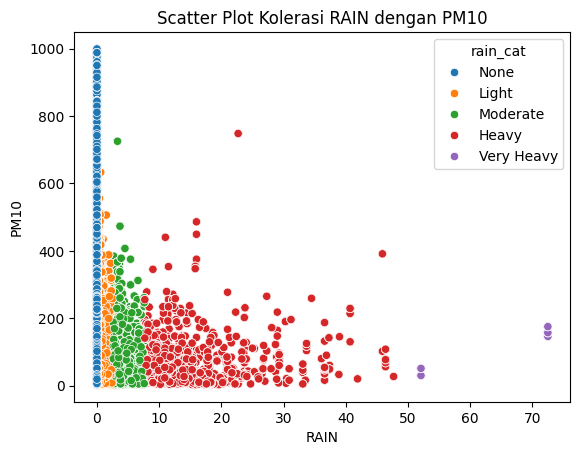

In [18]:
sns.scatterplot(x="RAIN", y="PM10", hue="rain_cat", data=cleaned_df).set_title("Scatter Plot Kolerasi RAIN dengan PM10")

Dari hasil visualisasi korelasi RAIN dengan PM10 didapat informasi berikut ini:
- Hujan yang lebih tinggi, terutama dalam kategori Heavy dan Very Heavy, mengarah pada penurunan yang lebih jelas dalam polusi PM10. Ini menunjukkan efek positif hujan dalam membersihkan udara dari partikel-partikel polutan.
- Meskipun ada banyak data yang menunjukkan PM10 rendah pada hari tanpa hujan (kategori None), ada juga titik data yang menunjukkan konsentrasi PM10 yang sangat tinggi. Hal ini mungkin menunjukkan bahwa meskipun tidak ada hujan, polusi udara tetap terjadi karena faktor-faktor lain seperti aktivitas manusia.

Text(0.5, 1.0, 'Scatter Plot Korelasi RAIN dengan NO2')

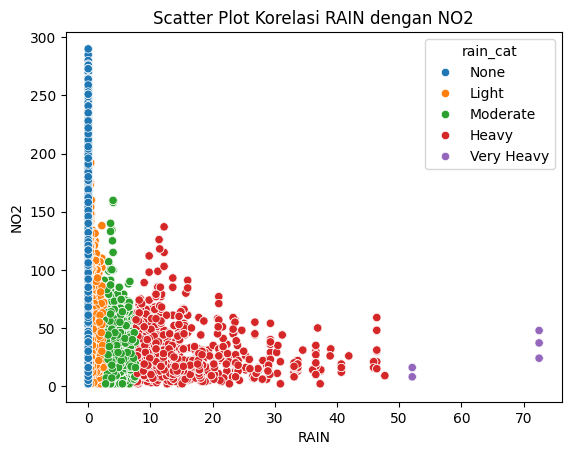

In [19]:
sns.scatterplot(x="RAIN", y="NO2", hue="rain_cat", data=cleaned_df).set_title("Scatter Plot Korelasi RAIN dengan NO2")

Dari hasil visualisasi korelasi RAIN dengan NO2 didapat informasi berikut ini:
- Hujan yang lebih berat cenderung mengurangi polusi NO2 secara signifikan, menunjukkan bahwa curah hujan tinggi dapat menjadi faktor penting dalam perbaikan kualitas udara.
- Hujan ringan hingga sedang tidak memiliki dampak yang kuat terhadap penurunan NO2, namun hujan yang lebih berat sangat efektif dalam mengurangi konsentrasi polutan udara ini.

Text(0.5, 1.0, 'Scatter Plot Korelasi RAIN dengan SO2')

d:\My Folder\Kuliah\Learn\Bangkit Mentor\venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
d:\My Folder\Kuliah\Learn\Bangkit Mentor\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


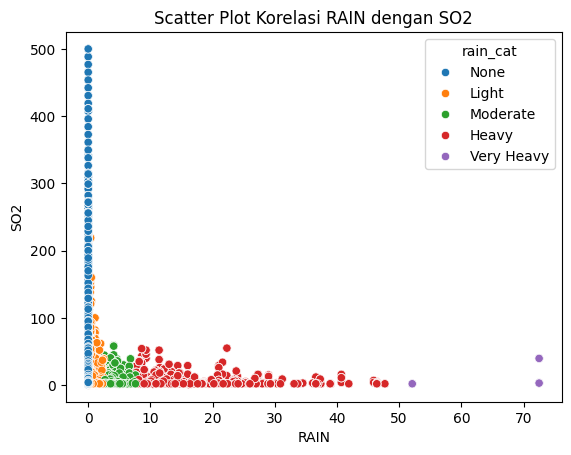

In [20]:

sns.scatterplot(x="RAIN", y="SO2", hue="rain_cat", data=cleaned_df).set_title("Scatter Plot Korelasi RAIN dengan SO2")

Dari hasil visualisasi korelasi RAIN dengan SO2 didapat informasi berikut ini:
- Semakin berat hujan, semakin rendah konsentrasi SO2 yang tercatat di atmosfer, dengan kategori Heavy dan Very Heavy menunjukkan penurunan yang sangat besar.
- Beberapa titik dengan nilai SO2 yang sangat tinggi (lebih dari 400) berada di sisi kiri plot (pada RAIN mendekati 0). Ini menunjukkan kejadian polusi yang sangat tinggi di saat tidak ada hujan, yang mungkin disebabkan oleh aktivitas industri atau pembakaran bahan bakar yang meningkatkan kadar SO2.

Text(0.5, 1.0, 'Heatmap RAIN dengan SO2, NO2, dan PM10')

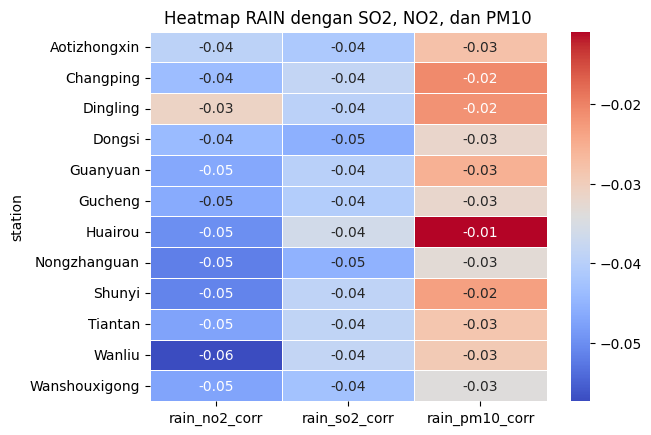

In [21]:
# Menampilkan heatmap correlation untuk RAIN dengan polusi
sns.heatmap(data=rain_corr_by_station, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5).set_title("Heatmap RAIN dengan SO2, NO2, dan PM10")


Hasil visualisasi heatmap di atas memberikan informasi berikut ini:
- Secara umum, curah hujan menunjukkan korelasi negatif dengan polusi NO2, SO2, dan PM10, meskipun efeknya bervariasi antara polutan dan kota.
- Curah hujan memiliki dampak yang lebih kecil terhadap SO2 dibandingkan dengan polutan lainnya.
Dari hasil visualisasi korelasi RAIN dengan NO2 didapat informasi berikut ini:
- Efek hujan terhadap kualitas udara juga dapat dipengaruhi oleh faktor geografis dan karakteristik lokal, yang mungkin menjelaskan mengapa beberapa stasiun menunjukkan korelasi yang lebih kuat daripada yang lain.

Dari hasil visualisasi di atas terkait korelasi antara RAIN dengan PM10, SO2, dan NO2 didapatkan jawaban dari pertanyaan 1, yaitu:
- Curah hujan cenderung menurunkan polusi NO2 dan PM10 secara signifikan, namun dampaknya terhadap SO2 lebih lemah. Ini menunjukkan bahwa hujan efektif dalam mengurangi polusi udara, tetapi pengaruhnya sangat bergantung pada jenis polutan, intensitas hujan, dan karakteristik lokal.
- Meskipun nilai korelasianatar RAIN dengan polusi sangatlah kecil, di beberapa kota menunjukkan korelasi yang lebih kuat dengan hujan, yang dapat dijelaskan oleh faktor geografis (seperti kepadatan penduduk, industri, dan vegetasi) dan karakteristik lokal lainnya yang mempengaruhi pola polusi udara. Kota dengan lebih banyak polusi atau yang terletak di daerah dengan ventilasi udara buruk cenderung menunjukkan penurunan kualitas udara yang lebih besar dengan hujan.

Dari jawaban di atas, pemerintah bisa menerapkan kebijakan yang memperhitungkan curah hujan sebagai faktor dalam pengelolaan kualitas udara, terutama di daerah dengan polusi tinggi yang dapat mendapat manfaat dari hujan lebih deras.

### Pertanyaan 2: Bagaimana tren peningkatan rata-rata curah hujan pada tiap kota untuk tiap tahunnya?

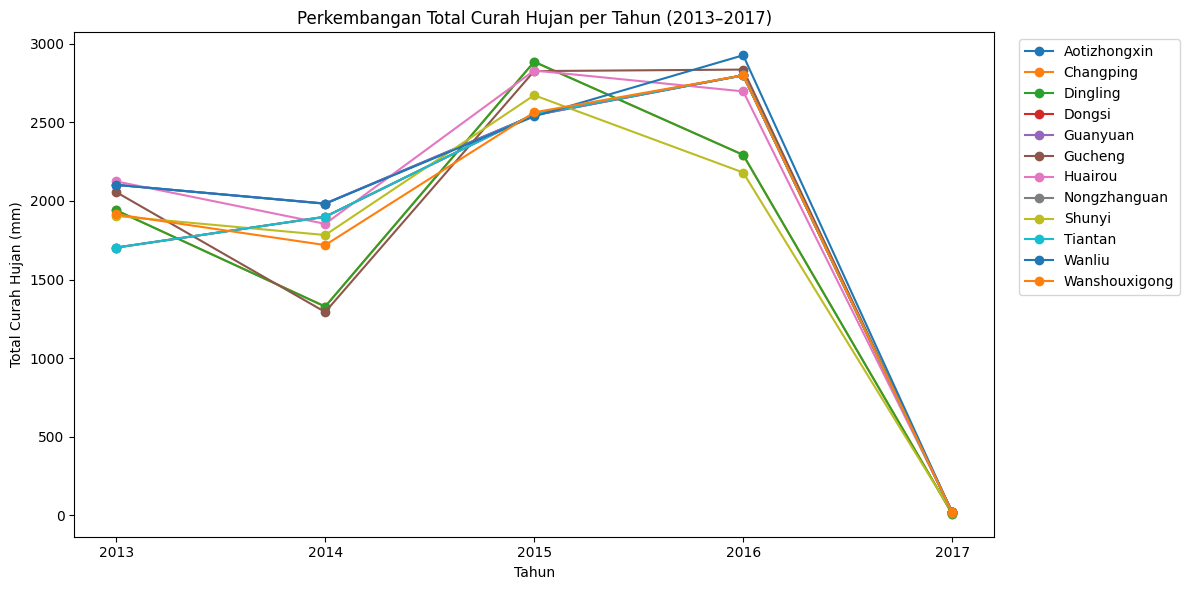

In [22]:
rain_sum_per_year = (
    rain_per_year
    .RAIN
    .groupby(['station','year'])
    .mean()
    .reset_index()[["station", "year", "sum"]]
) 

rain_sum_per_year.rename(columns={'sum': 'total_rain'}, inplace=True)
rain_pivot = rain_sum_per_year.pivot(
    index="year",
    columns="station",
    values="total_rain"
)

plt.figure(figsize=(12,6))
for station in rain_pivot.columns:
    plt.plot(
        rain_pivot.index,
        rain_pivot[station],
        marker='o',
        label=station
    )

plt.title('Perkembangan Total Curah Hujan per Tahun (2013–2017)')
plt.xlabel('Tahun')
plt.ylabel('Total Curah Hujan (mm)')
plt.xticks(rain_pivot.index)        # tampilkan tiap tahun
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()


Dari hasil visualisasi line chart didapatkan jawaban dari pertanyaan 2, yaitu:
- Banyak kota menunjukkan penurunan curah hujan pada tahun 2013 ke 2014. Meskipun begitu, curah hujan kebanyakan kota pada tahun 2014 hingga 2016 mengalami kenaikan, dengan puncaknya terjadi pada tahun 2016.
- Tahun 2017 menunjukkan penurunan curah hujan yang signifikan di sebagian besar kota. Ini mungkin mengindikasikan tahun yang lebih kering atau adanya fenomena iklim tertentu yang mempengaruhi seluruh wilayah pada tahun tersebut.

Dari jawaban di atas, bisa disarankan untuk pemerintah dan otoritas terkait untuk mempertimbangkan fluktuasi curah hujan dalam perencanaan infrastruktur dan pengelolaan air, terutama untuk mengantisipasi tahun-tahun dengan curah hujan rendah seperti 2017 dan jumlah curah hujan yang cenderung berubah-ubah.

### Pertanyaan 3: Bagaimana persebaran polusi NO2 di tiap kota pada tahun 2017? 

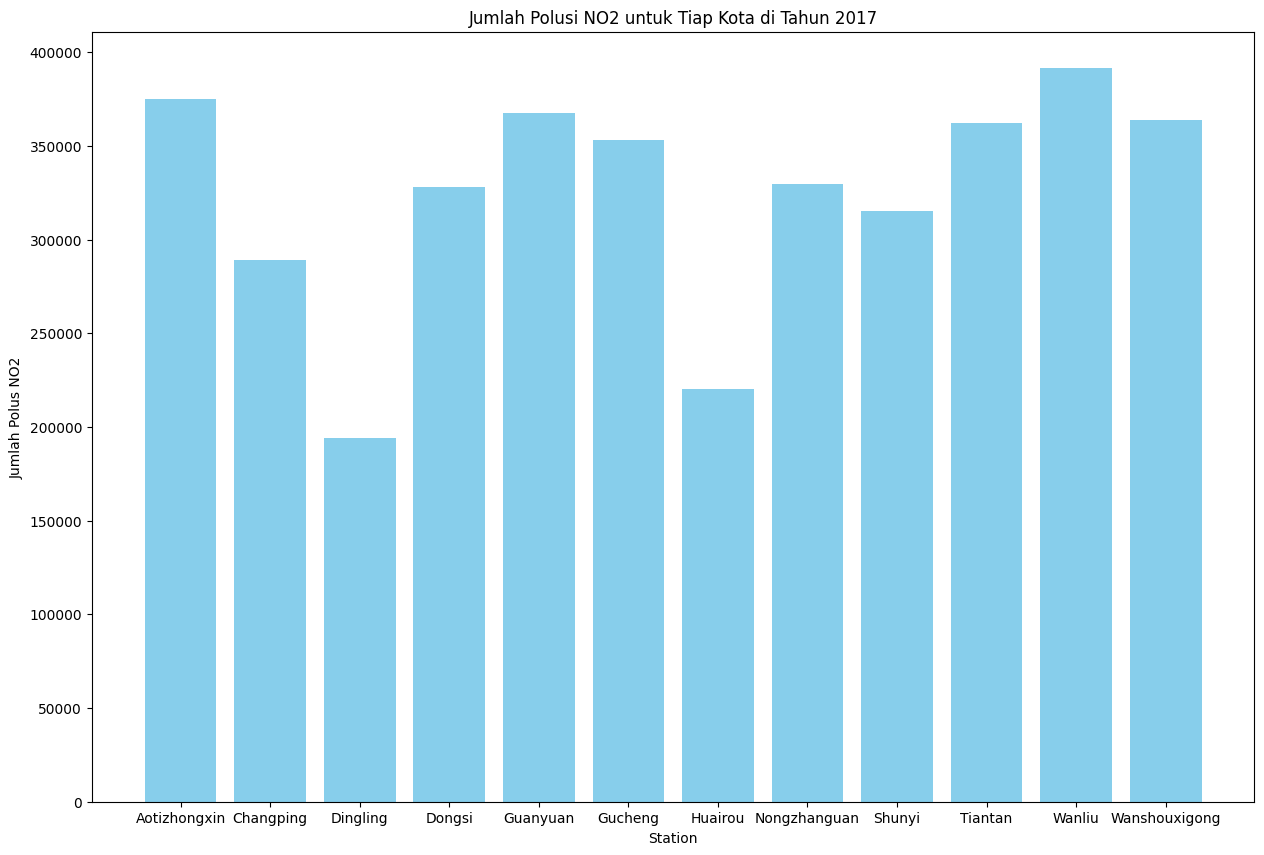

In [23]:
polution_sum_by_station = polution_by_station.NO2.reset_index()

plt.figure(figsize=(15,10))
plt.bar(polution_sum_by_station["station"], polution_sum_by_station["sum"], color="skyblue")
plt.xlabel("Station")
plt.ylabel("Jumlah Polus NO2")
plt.title("Jumlah Polusi NO2 untuk Tiap Kota di Tahun 2017")
plt.show()

Dari hasil visualisasi di atas didapatkan jawaban dari pertanyaan 3, yaitu:
- Kota-kota seperti Aotizhongxin, Guanyuan, Wanliu, dan Wanshouxigong menunjukkan tingkat polusi NO2 yang lebih tinggi, hal ini bisa disebabkan oleh kepadatan penduduk yang tinggi, tingkat transportasi yang tinggi, atau aktivitas industri yang lebih besar.
- Dingling dan Huairou menunjukkan tingkat polusi yang lebih rendah. Ini bisa jadi disebabkan oleh lokasi geografis yang lebih sedikit terpengaruh oleh sumber polusi atau kebijakan pengelolaan kualitas udara yang lebih baik di daerah tersebut.
- Beberapa kota menunjukkan konsistensi dalam hal jumlah polusi NO2, yang mungkin mencerminkan pola polusi yang serupa atau faktor-faktor yang memiliki pengaruh serupa, seperti zona industri atau transportasi yang padat.
  
Dari jawaban di atas, ternyata jumlah polusi NO2 di kota-kota sangatlah besar yaitu mencapai 350000, hal ini tentunya daoat menimbulakn dampak yang buruk bagi kesehatan. Oleh karena itu, diperlukan kebijakan yang lebih ketat di kota-kota dengan polusi NO2 yang tinggi, sementara kota-kota dengan polusi lebih rendah dapat mempertahankan atau juga ikut menerapkan kebijakan pengelolaan udara bersih.

## Analisis Lanjutan (Opsional)

1. Analisis lanjutan persebaran NO2 di tiap kota pada tahun 2017

In [24]:
import geopy.geocoders
import geopandas

stations = cleaned_df["station"].unique()
geolocator = geopy.geocoders.Nominatim(user_agent="air_quality")

data_station = []
data_lat = []
data_lon = []

for station in stations:
    location = geolocator.geocode(station)
    if location is None:
        continue
    data_station.append(station)
    data_lat.append(location.latitude)
    data_lon.append(location.longitude)

geo_df = pd.DataFrame({
    "Station" : data_station,
    "Latitude" : data_lat,
    "Longitude" : data_lon,
    "NO2" : polution_sum_by_station[polution_sum_by_station["station"] != "Wanshouxigong"]["sum"]
})

gdf = geopandas.GeoDataFrame(
    geo_df, geometry=geopandas.points_from_xy(geo_df.Longitude, geo_df.Latitude)
)

gdf

,Station,Latitude,Longitude,NO2,geometry
0,Aotizhongxin,34.374734,109.016205,375124.0,POINT (109.0162 34.37473)
1,Changping,40.219646,116.225091,288948.0,POINT (116.22509 40.21965)
2,Dingling,40.162427,117.653096,194112.0,POINT (117.6531 40.16243)
3,Dongsi,39.929247,116.417731,327894.0,POINT (116.41773 39.92925)
4,Guanyuan,29.558719,112.007610,367712.0,POINT (112.00761 29.55872)
5,Gucheng,37.349035,115.964682,352980.0,POINT (115.96468 37.34903)
6,Huairou,40.315481,116.626028,220086.0,POINT (116.62603 40.31548)
7,Nongzhanguan,39.943720,116.466225,329818.0,POINT (116.46623 39.94372)
8,Shunyi,40.148750,116.653875,314960.0,POINT (116.65387 40.14875)
9,Tiantan,39.887858,116.392896,362190.0,POINT (116.3929 39.88786)



Code di atas melakukan pencarian Latitude dan Longitude dari tiap station dengan menggunakan bantuan library geopy. Hasil dari proses ini digunakan untuk membuat geodataframe yang akan digunakan untuk proses visualisasi. Namun, tidak ditemukan data dari stasiun Wanshouxigong yang menyebabkan tidak bisa melakukan analisis untuk stasiun ini.

In [25]:
import folium
from folium.plugins import MarkerCluster

map_center = [geo_df["Latitude"].mean(), geo_df["Longitude"].mean()]

mymap = folium.Map(
    location=map_center,      
    zoom_start=6,
    min_zoom=5,
    max_zoom=10
)
bounds = [[geo_df["Latitude"].min(), geo_df["Longitude"].min()],
          [geo_df["Latitude"].max(), geo_df["Longitude"].max()]]

mymap.fit_bounds(bounds)

marker_cluster = MarkerCluster().add_to(mymap)
for idx, row in geo_df.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=8,  
        popup=f'{row["Station"]}: {row["NO2"]:.2f} µg/m³',  
        tooltip=f'{row["Station"]}: {row["NO2"]:.2f} µg/m³',
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.6
    ).add_to(marker_cluster)


mymap.save("no2_pollution_map.html")
mymap

Dari hasil visualisasi di atas, bisa didapatkan beberapa informasi, yaitu:
- Kota dengan jumlah polusi NO2 yang tinggi seperti Wanliu, Aotizhongxin, Guanyuan, dan lain-lain terletak di daerah dengan banyak jalur transportasi dan daerah perkotaan yang padat. Hal ini menandai bahwa salah satu tingginya polusi di kota tersebut adalah dari polusi kendaraan dan dari polusi industri.
-  Kota Dingling dan Huairou memiliki jumlah polusi yang rendah jika dibandingkan dengan kota lainnya. Kedua kota tersebut dekat dengan daerah perhutanan dan jauh dari kepadatan lalu lintas dan manusia.

Dari informasi di atas, bisa disimpulkan bahwa tingkat kehijauan atau banyaknya pohon berpengaruh dengan tingkat polusi NO2 yang ada. Tidak hanya itu, kepadatan penduduk juga menjadi salah satu faktor dalam tingkat polusi NO2 dalam kota. Dari informasi ini diharapkan dapat membantu pemerintah atau pemangku kebijakan untuk membuat kebijakan yang mengatur terkait penghijauan dan pemerataan industri agar tingkat polusi NO2 dapat ditangani.

## Conclusion

- Conclution pertanyaan 1
 
Meskipun korelasi antara RAIN dengan polusi sangat kecil, beberapa kota menunjukkan korelasi yang lebih kuat dengan hujan, yang dapat dijelaskan oleh faktor geografis seperti kepadatan penduduk, tingkat industri, dan vegetasi yang memengaruhi pola polusi udara.

Rekomendasi: Pemerintah dapat mempertimbangkan curah hujan sebagai faktor dalam pengelolaan kualitas udara, terutama di daerah dengan polusi tinggi, yang bisa mendapat manfaat dari hujan lebih deras.

- Conclution pertanyaan 2

Banyak kota menunjukkan penurunan curah hujan pada tahun 2013 hingga 2014, namun curah hujan kebanyakan kota mengalami kenaikan antara tahun 2014 hingga 2016, dengan puncaknya terjadi pada tahun 2016. Tahun 2017 menunjukkan penurunan curah hujan yang signifikan di sebagian besar kota. Hal ini mungkin mengindikasikan tahun yang lebih kering atau adanya fenomena iklim tertentu yang mempengaruhi wilayah secara keseluruhan.

Rekomendasi: Pemerintah dan otoritas terkait perlu mempertimbangkan fluktuasi curah hujan dalam perencanaan infrastruktur dan pengelolaan air, terutama untuk mengantisipasi tahun-tahun dengan curah hujan rendah, seperti 2017, dan menghadapi ketidakpastian dalam perubahan curah hujan.

- Conclution pertanyaan 3

Kota-kota seperti Aotizhongxin, Guanyuan, Wanliu, dan Wanshouxigong menunjukkan tingkat polusi NO2 yang lebih tinggi, yang kemungkinan disebabkan oleh kepadatan penduduk, tingkat transportasi yang tinggi, dan aktivitas industri yang lebih besar di kota-kota tersebut. 
Dingling dan Huairou menunjukkan tingkat polusi NO2 yang lebih rendah. Hal ini mungkin karena lokasi geografis yang lebih sedikit terpengaruh oleh sumber polusi atau karena adanya pengelolaan kualitas udara yang lebih baik di daerah tersebut.
Beberapa kota menunjukkan konsistensi dalam hal jumlah polusi NO2, yang mencerminkan pola polusi yang serupa atau faktor-faktor lain yang memiliki pengaruh serupa, seperti zona industri atau area dengan transportasi padat.

Rekomendasi: Diperlukan kebijakan yang lebih ketat di kota-kota dengan polusi NO2 tinggi, sementara kota-kota dengan polusi lebih rendah dapat mempertahankan atau ikut menerapkan kebijakan pengelolaan udara bersih.

In [33]:

sorted_polution = polution_by_station.NO2.reset_index().sort_values(by="sum", ascending=False)
sorted_polution

,station,sum,mean,min,max
10,Wanliu,391306.0,69.086511,2.0,249.0
0,Aotizhongxin,375124.0,66.229520,2.0,217.0
4,Guanyuan,367712.0,64.920904,2.0,207.0
11,Wanshouxigong,363716.0,64.215395,2.0,251.0
9,Tiantan,362190.0,63.945975,2.0,241.0
5,Gucheng,352980.0,62.319915,2.0,276.0
7,Nongzhanguan,329818.0,58.230579,2.0,194.0
3,Dongsi,327894.0,57.890890,2.0,192.0
8,Shunyi,314960.0,55.607345,2.0,258.0
1,Changping,288948.0,51.014831,2.0,203.0


In [34]:
cleaned_df.to_csv("./dataset/cleaned_PRSA_Data.csv")

In [ ]:
cleaned_df2 = pd.read_csv("./dataset/cleaned_PRSA_Data.csv")
sub = cleaned_df2[["station", "year", "NO2"]]

sub_2017 = sub[sub["year"] == 2017]

polution_by_station = sub_2017.groupby(by="station").agg({
    "NO2": ["sum", "mean", "min", "max"],
})

sorted_polution = polution_by_station.NO2.reset_index().sort_values(by="sum", ascending=False)

In [36]:
sorted_polution

,station,sum,mean,min,max
10,Wanliu,391306.0,69.086511,2.0,249.0
0,Aotizhongxin,375124.0,66.229520,2.0,217.0
4,Guanyuan,367712.0,64.920904,2.0,207.0
11,Wanshouxigong,363716.0,64.215395,2.0,251.0
9,Tiantan,362190.0,63.945975,2.0,241.0
5,Gucheng,352980.0,62.319915,2.0,276.0
7,Nongzhanguan,329818.0,58.230579,2.0,194.0
3,Dongsi,327894.0,57.890890,2.0,192.0
8,Shunyi,314960.0,55.607345,2.0,258.0
1,Changping,288948.0,51.014831,2.0,203.0
